# Stock Forecasting using Pastas (Adding Trends)

https://pastas.readthedocs.io/en/latest/index.html  
https://github.com/pastas/pastas  

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pastas as ps

import yfinance as yf
yf.pdr_override()

In [2]:

ps.show_versions()

Python version: 3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]
Numpy version: 1.19.5
Scipy version: 1.5.4
Pandas version: 1.1.5
Pastas version: 0.18.0
Matplotlib version: 3.3.4


In [3]:
stock = 'AMD' # input
start = '2021-01-01' # input 
end = '2021-11-23'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-16,145.929993,153.080002,145.339996,152.449997,152.449997,53100800
2021-11-17,151.979996,154.660004,149.690002,151.339996,151.339996,54527500
2021-11-18,157.070007,158.889999,152.559998,155.020004,155.020004,60612700
2021-11-19,155.759995,156.919998,153.449997,155.410004,155.410004,41668900
2021-11-22,157.139999,161.880005,152.389999,152.520004,152.520004,58674100


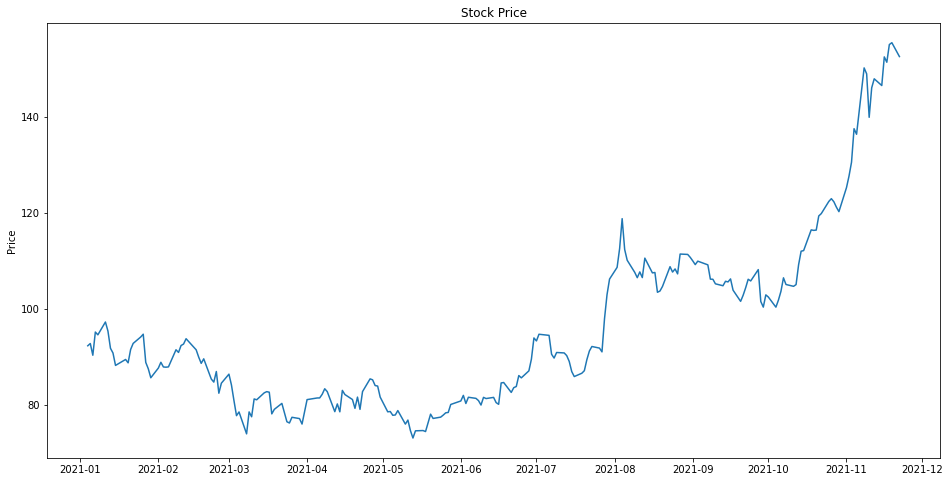

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [7]:
df['Middle'] = df['High'] - df['Low']

In [8]:
df['Returns'] = df['Adj Close'].pct_change()

In [9]:
df = df.rename(columns={'Adj Close':'AdjClose'})

In [10]:
df = df.dropna()

In [11]:
df.head()

,Open,High,Low,Close,AdjClose,Volume,Middle,Returns
Date,,,,,,,,
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,1.799995,0.005092
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,2.820000,-0.026302
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,4.310005,0.053471
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,3.130005,-0.006095
2021-01-11,94.029999,99.230003,93.760002,97.250000,97.250000,48600200,5.470001,0.028230


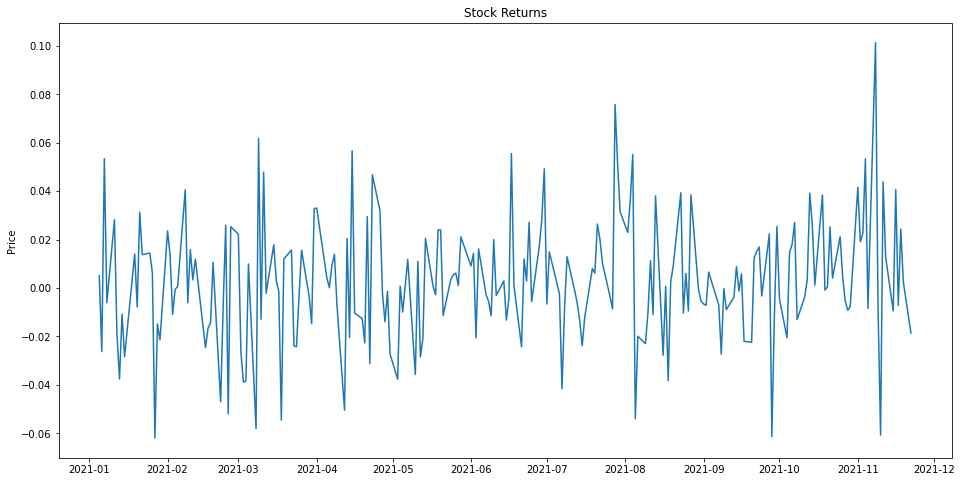

In [12]:
plt.figure(figsize=(16,8))
plt.plot(df['Returns'])
plt.title('Stock Returns')
plt.ylabel('Price')
plt.show()

In [13]:
df.columns.values

array(['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume', 'Middle',
       'Returns'], dtype=object)

In [14]:
df2 = df['AdjClose'].resample('D').mean().interpolate('linear')

In [15]:
ml = ps.Model(df2)

# Add the recharge data as explanatory variable
sm = ps.StressModel(df2, ps.Gamma, name='AdjClose', settings="evap")
ml.add_stressmodel(sm)

INFO: Inferred frequency for time series AdjClose: freq=D
INFO: Inferred frequency for time series AdjClose: freq=D


INFO: Time Series AdjClose was extended to 2011-01-08 00:00:00 with the mean value of the time series.


<AxesSubplot:title={'center':'Results of AdjClose'}, ylabel='Groundwater levels [meter]'>

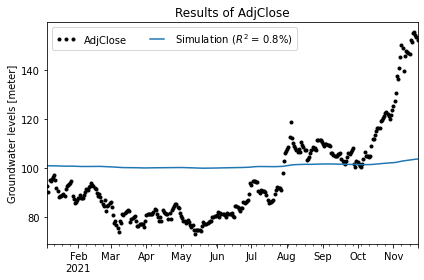

In [16]:
ml.plot()